<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import copy

Ustawienie ziarna losowości

In [2]:
np.random.seed(1234)

<h2>Zadanie 2.</h2>

<h3>Funkcja do optymalizacji</h3>

<h3>$F(x^{(0)},x^{(1)},...,x^{(n)}) = \lambda_1\sum_{i=0}^n\sum_{j=1}^k\frac{1}{\epsilon+||x^{(i)}-r^{(j)}||^2_2} + \lambda_2\sum_{i=0}^{n-1}||x^{(i+1)}-x^{(i)}||^2_2$</h3>

<h4>$x^{(i)} \in \mathbb{R}^2$ - punkty ścieżki, $i=0,...,n$</h4>

<h4>$x^{(0)}$ oraz $x^{(n)}$ to początek i koniec ścieżki - są stałe</h4>

<h4>$r^{(i)} \in \mathbb{R}^2$ - przeszkody, $i=1,...,k$</h4>

<h4>$\lambda_1$ - waga składnika zapobiegającego zbytniemu zbliżaniu się do przeszkody</h4>

<h4>$\lambda_2$ - waga składnika zapobiegającego tworzeniu bardzo długich ścieżek</h4>

<h4>$\epsilon$ - zapobiega dzieleniu przez 0</h4>

Definicja parametrów

In [3]:
# define parameters
n = 20
k = 50
x0 = np.array([[0, 0]])
xn = np.array([[20, 20]])
start_xs = []
for i in range(5):
    xs = np.append(x0, np.random.uniform(0, 20, (n-1, 2)), axis=0)
    start_xs.append(np.append(xs, xn, axis=0))
rs = np.random.uniform(0, 20, (k, 2))
l1 = 1
l2 = 1
eps = 1e-13
iters = 400

Definicja funkcji kosztu

In [4]:
# define cost function
def cost(n, k, xs, rs, l1, l2, eps):
    # first sum
    sum1 = 0
    for i in range(n+1):
        for j in range(k):
            sum1 += 1/(np.finfo(np.float64).eps + np.linalg.norm(xs[i]-rs[j])**2)

    # second sum
    sum2 = 0
    for i in range(n):
        sum2 += np.linalg.norm(xs[i+1]-xs[i])**2

    # return sums multiplied by given weights
    return l1*sum1 + l2*sum2

# define cost with given parameters
F = lambda xs: cost(n, k, xs, rs, l1, l2, eps)

Definicja gradientu funkcji

In [5]:
# define gradient of function
def gradient(n, k, xs, rs, l1, l2, eps):
    grad = np.zeros((n+1,2))

    # ignore x0 and xn, because they're constant
    for i in range(1, n):
        for j in range(k):
            grad[i] += (xs[i] - rs[j]) / (np.finfo(np.float64).eps + np.linalg.norm(xs[i]-rs[j])**2)**2
        grad[i] *= -2*l1
        grad[i] += 2*l2*(-xs[i+1]+2*xs[i]-xs[i-1])

    return grad

# define gradient with given parameters
F_grad = lambda xs: gradient(n, k, xs, rs, l1, l2, eps)

Defnicja funkcji spadku wzdłuż gradientu

In [6]:
# gradient descent function
def gd(xs, cost, gradient, iters, tolerance):
    xs_copy = copy.deepcopy(xs)
    costs = [cost(xs_copy)]
    for i in range(iters):
        grad = gradient(xs_copy)
        lr = sp.optimize.golden(lambda alpha: cost(xs_copy + alpha*grad))
        xs_copy += lr*grad
        costs.append(cost(xs_copy))
        # stop if improvement is less than tolerance
        if np.abs(costs[-2] - costs[-1]) < tolerance:
            break
    return xs_copy, costs

Obliczenie wyników dla startowych zbiorów punktów x

In [7]:
# optimize path for all starting xs
results = [gd(xs, F, F_grad, iters, eps) for xs in start_xs]

Wypisanie ostatecznych kosztów

In [8]:
# print costs before and after
for i, (_, costs) in enumerate(results):
    print(f"{i+1}. starting xs:")
    print(f"\tcost before: {costs[0]}")
    print(f"\tcost after: {costs[-1]}")

1. starting xs:
	cost before: 2868.114431732245
	cost after: 79.81485530765255
2. starting xs:
	cost before: 3607.629165636372
	cost after: 81.24282429618664
3. starting xs:
	cost before: 2684.6102745504613
	cost after: 80.73054944763072
4. starting xs:
	cost before: 3462.097743280995
	cost after: 76.77467804435327
5. starting xs:
	cost before: 2340.27168878305
	cost after: 80.74533364653169


Narysowanie wykresu kosztu w zależności od iteracji

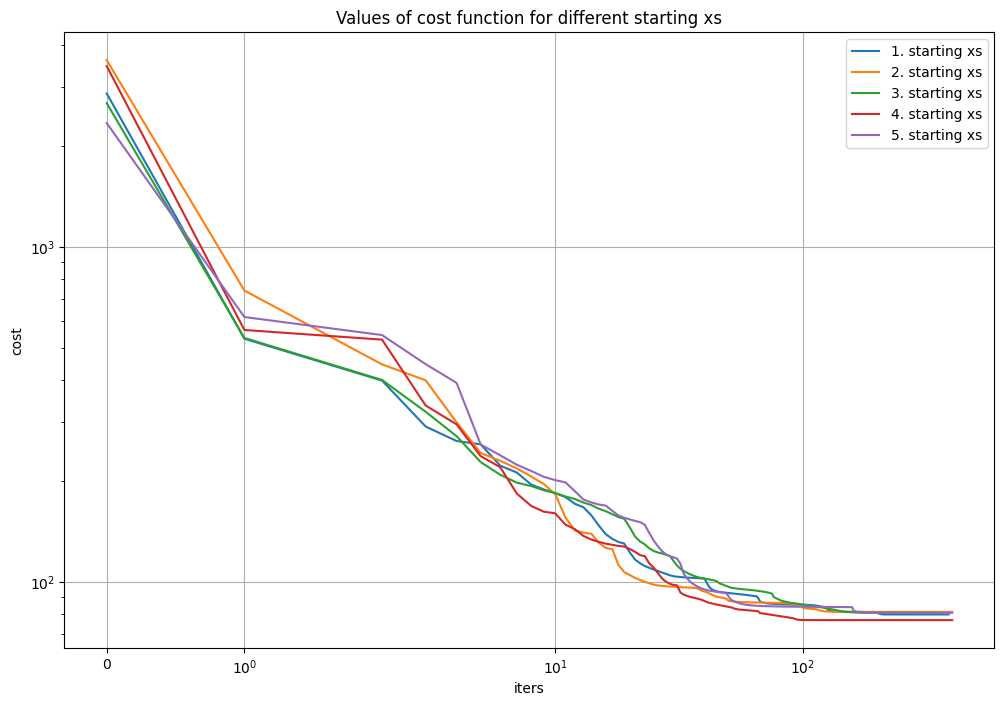

In [9]:
# set iters
its = np.arange(0, 401, 1)
# set figsize
plt.figure(figsize=(12,8))
# set scales
plt.xscale("symlog")
plt.yscale("log")
# add title and labels
plt.title(rf"Values of cost function for different starting xs")
plt.xlabel("iters")
plt.ylabel("cost")
# plot cost functions
for i, result in enumerate(results):
    plt.plot(its[:len(result[1])], result[1], label=f"{i+1}. starting xs")
# show with legend
plt.legend()
plt.grid()
plt.show()

Funkcja rysująca ścieżkę

In [10]:
# draw path
def draw_path(xs, rs, title):
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    # plot path
    plt.plot(xs[:,0], xs[:,1], label="path", marker='o')
    # plot obstacles
    plt.plot(rs[:,0], rs[:,1], label="obstacles", marker='x', linestyle='')
    # show with legend
    plt.legend()
    plt.grid()
    plt.show()

Narysowanie ścieżek przed i po

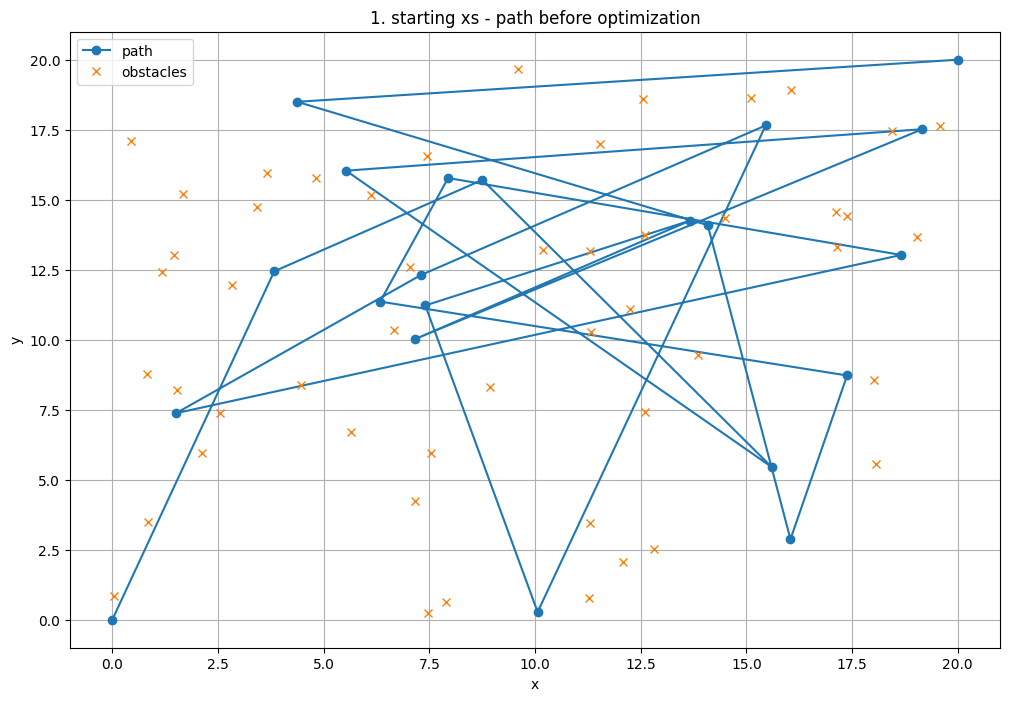

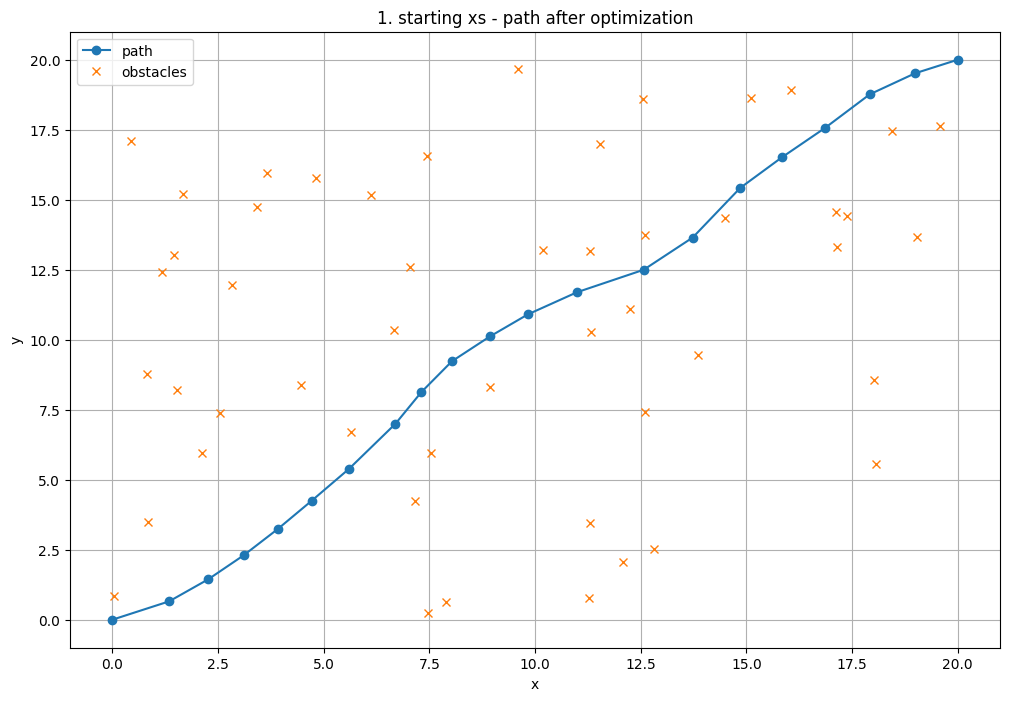

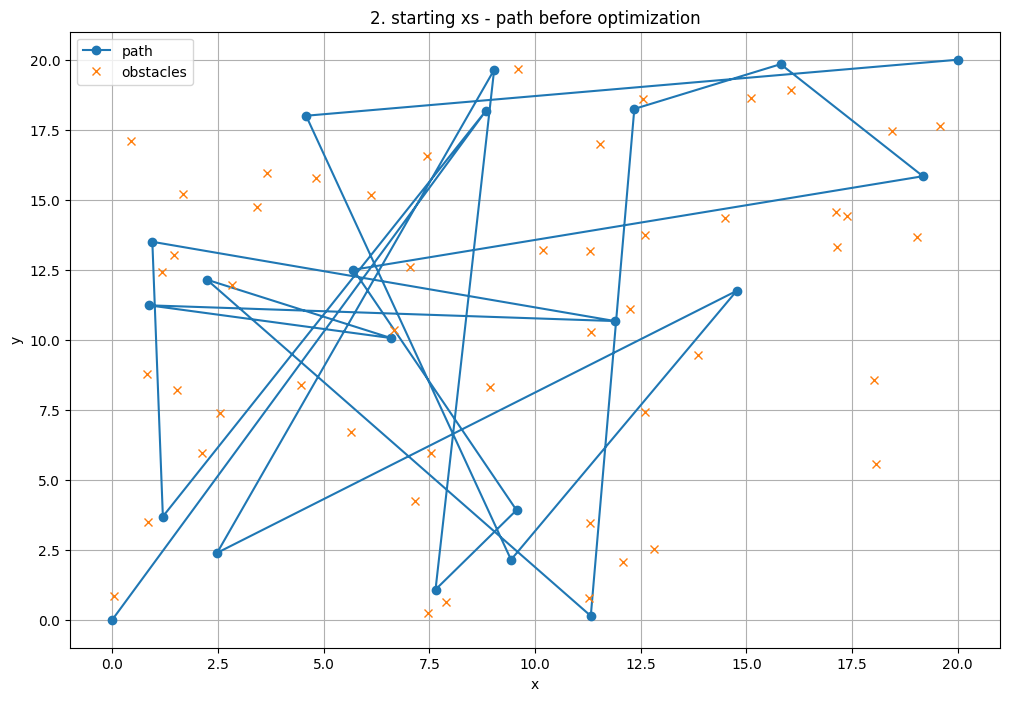

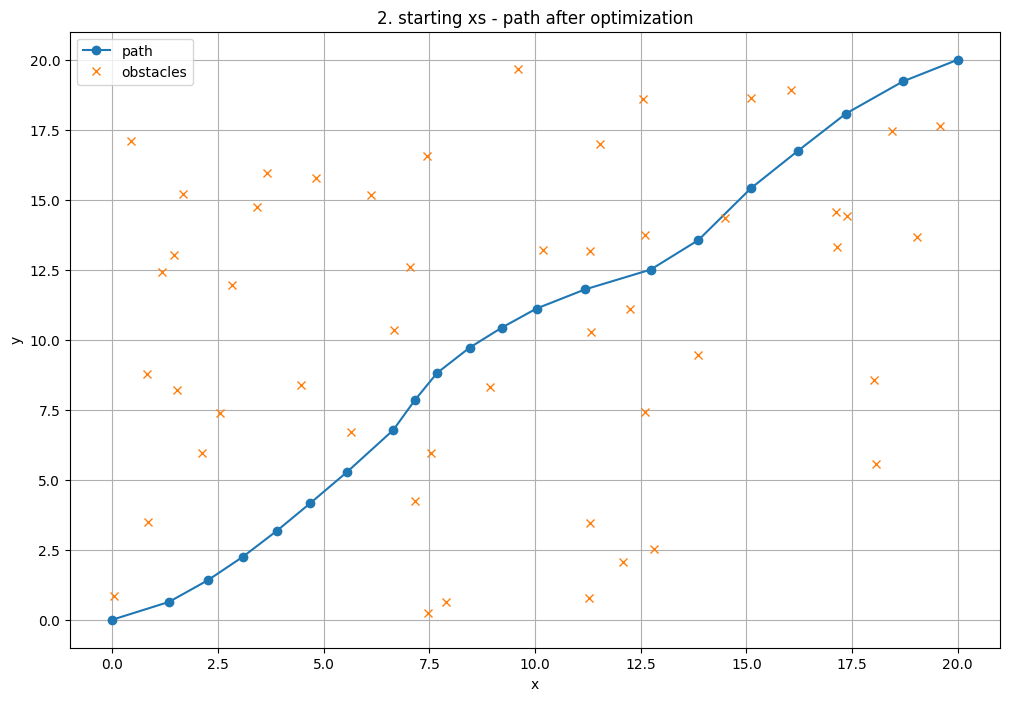

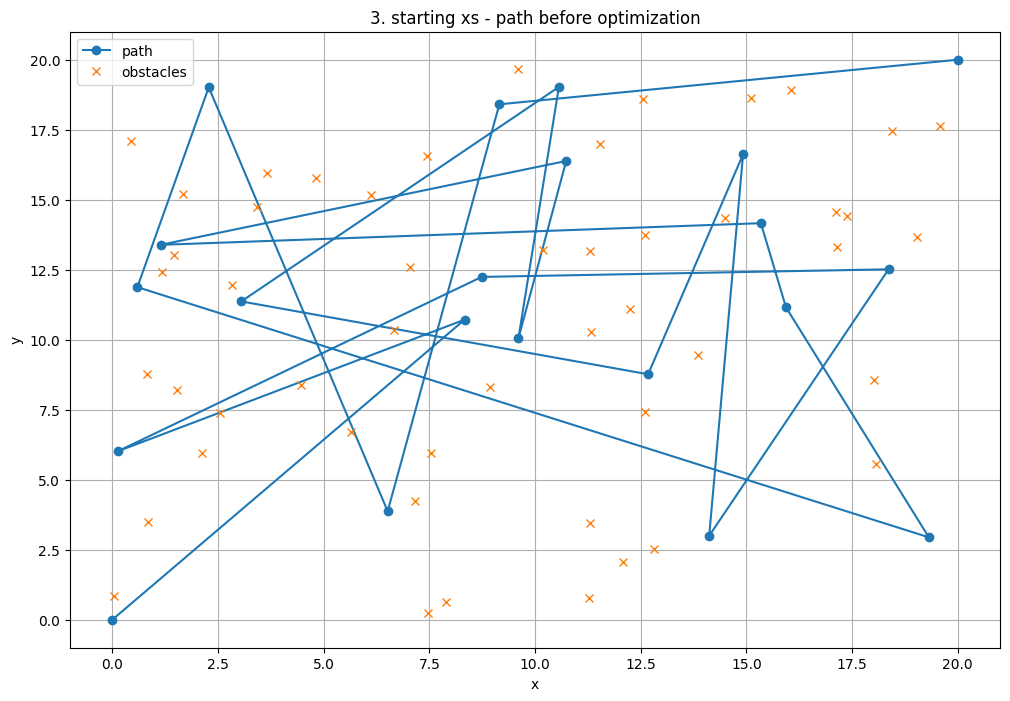

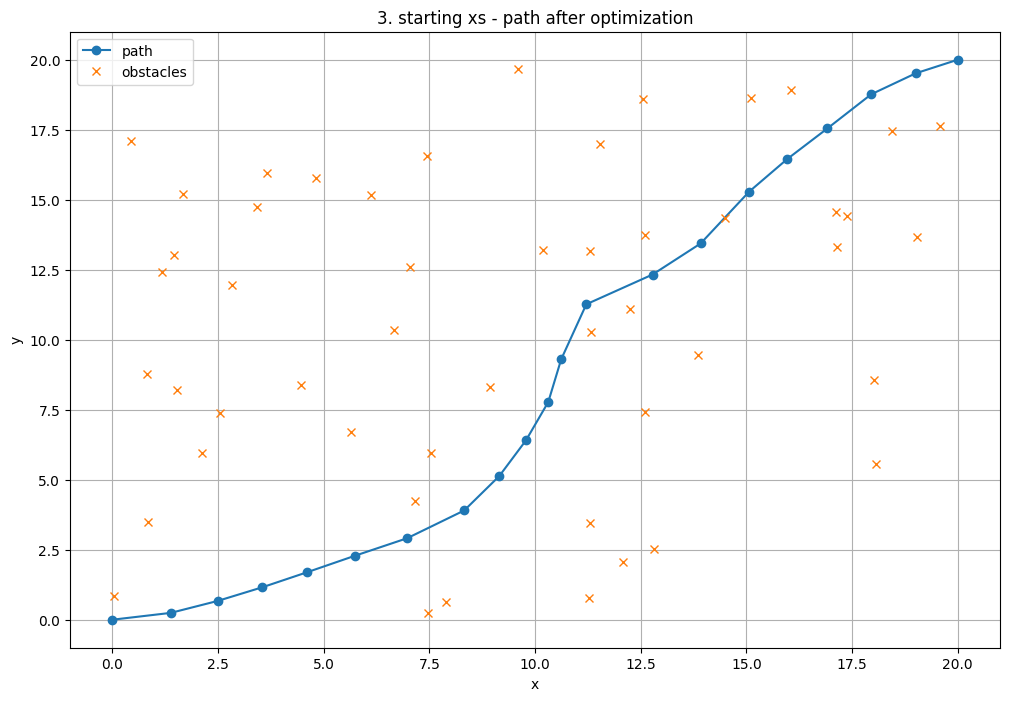

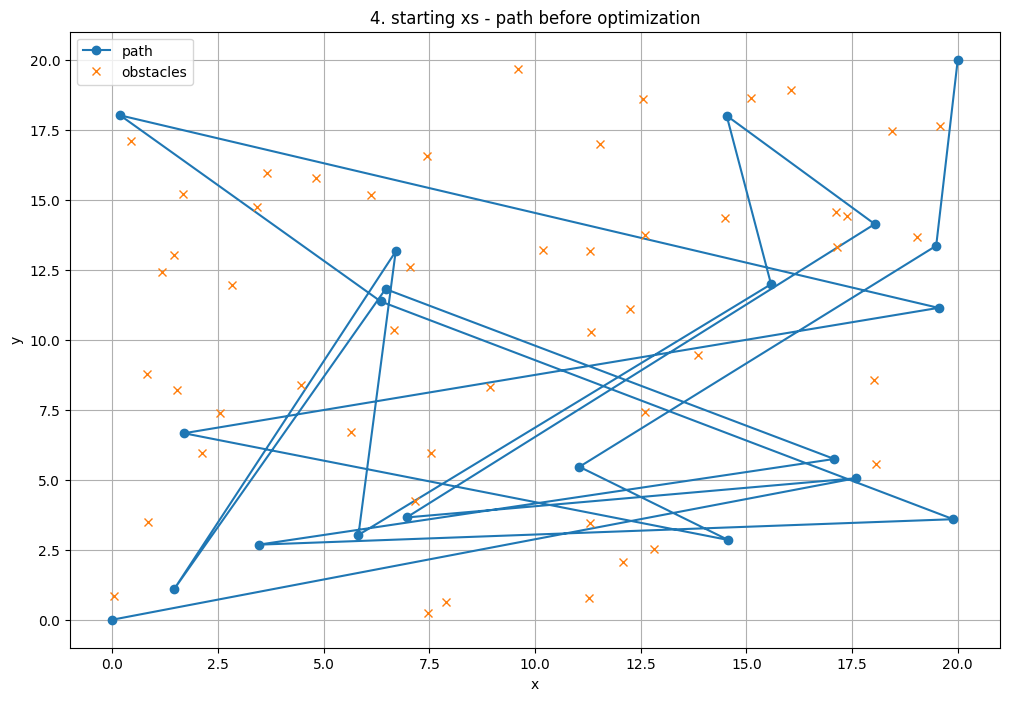

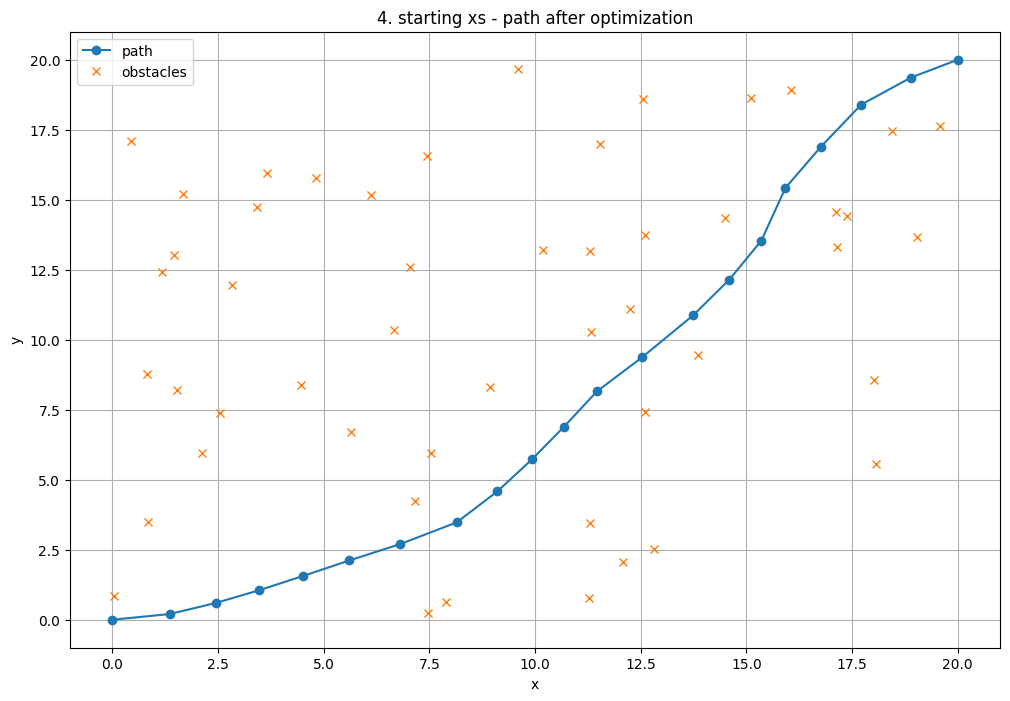

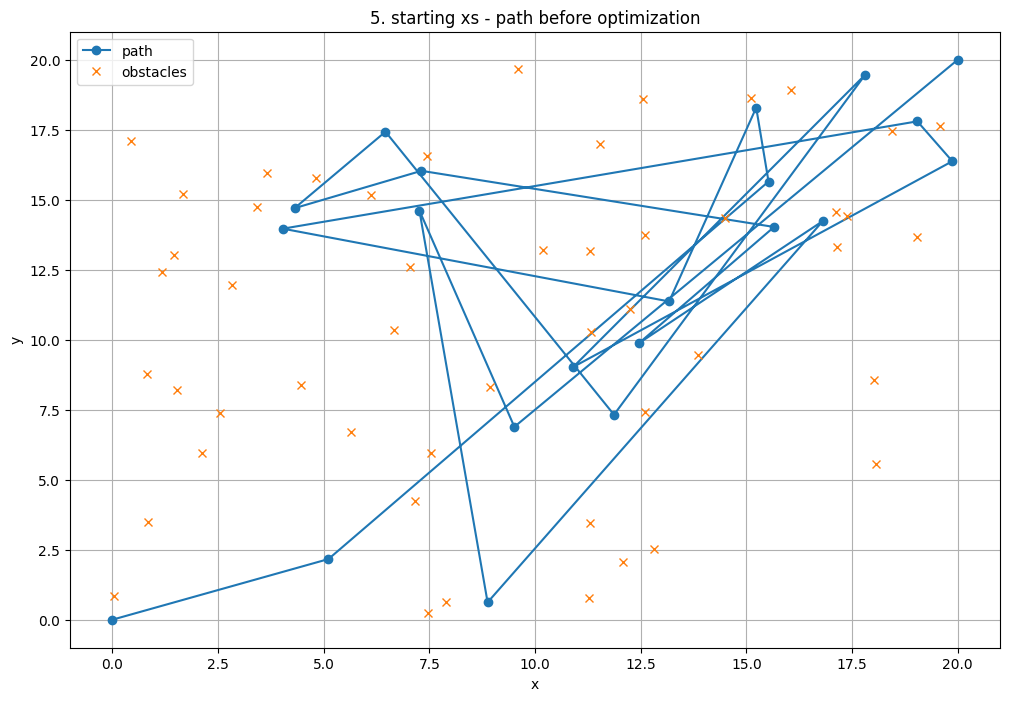

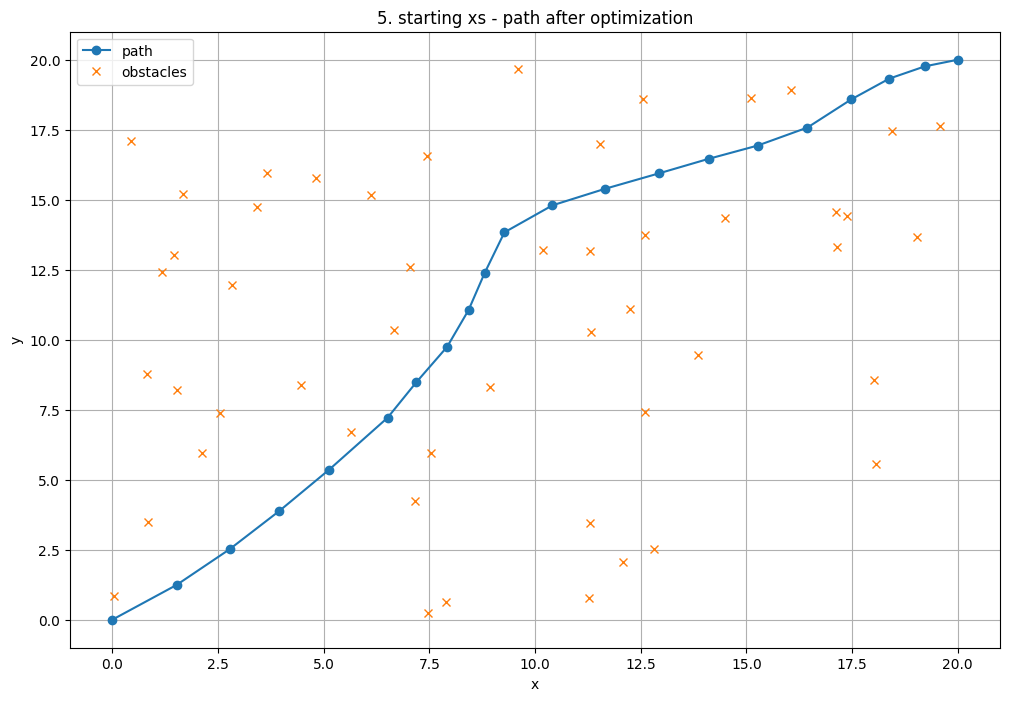

In [11]:
# draw before and after paths
for i in range(len(start_xs)):
    draw_path(start_xs[i], rs, f"{i+1}. starting xs - path before optimization")
    draw_path(results[i][0], rs, f"{i+1}. starting xs - path after optimization")